# Economic Data Analysis with Fred and Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '6428d204ced9723da1585a5e5316d06f'


## Create Fred Object

In [2]:
fred = Fred(api_key=fred_key)

## Search Fred

In [3]:
sp_search = fred.search('S&P', order_by='popularity')

In [4]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-03-01,2024-03-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-02-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-03-01 07:49:03-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-03-01,2024-03-01,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-02-27 08:14:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-03-01,2024-03-01,S&P 500,2014-03-03,2024-03-01,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-03-01 19:11:01-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-03-01,2024-03-01,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-03-01,2024-03-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-02-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-03-01 07:49:04-06:00,82,This data represents the effective yield of th...


## Pull Raw Data and Plot

In [5]:
sp500_data = fred.get_series('SP500')

In [6]:
sp500_data

2014-03-03    1845.73
2014-03-04    1873.91
2014-03-05    1873.81
2014-03-06    1877.03
2014-03-07    1878.04
               ...   
2024-02-26    5069.53
2024-02-27    5078.18
2024-02-28    5069.76
2024-02-29    5096.27
2024-03-01    5137.08
Length: 2610, dtype: float64

<Axes: title={'center': 'S&P 500'}>

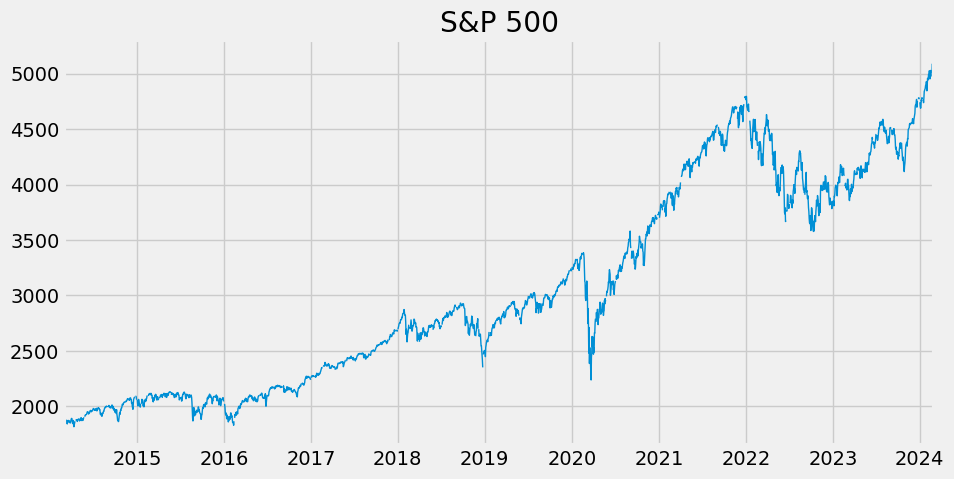

In [7]:
sp500_data.plot(figsize=(10,5), title="S&P 500", lw = 1)

## Pull and Join Multiple Data Sets

In [8]:
fred.search('unemployment').head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-03-01,2024-03-01,Unemployment Rate,1948-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-03-01,2024-03-01,Unemployment Rate,1948-01-01,2024-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-02-02 07:49:06-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-03-01,2024-03-01,Unemployment Level,1948-01-01,2024-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-02-02 07:49:03-06:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-03-01,2024-03-01,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-02-08 14:46:04-06:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-03-01,2024-03-01,Continued Claims (Insured Unemployment),1967-01-07,2024-02-17,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-02-29 07:33:05-06:00,74,"Continued claims, also referred to as insured ..."


In [9]:
unrate = fred.get_series('unrate')

In [10]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-09-01    3.8
2023-10-01    3.8
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
Length: 913, dtype: float64

<Axes: title={'center': 'Unemployment Rate'}>

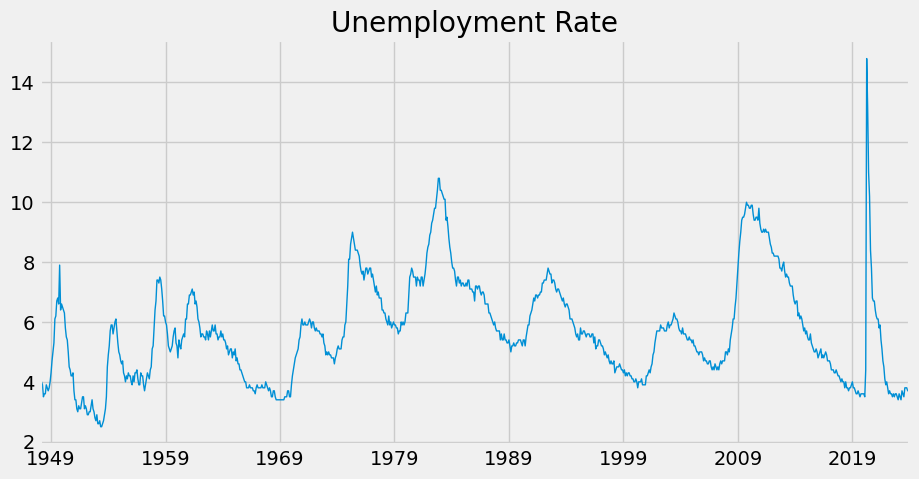

In [11]:
unrate.plot(title="Unemployment Rate", figsize=(10, 5), lw=1)

In [12]:
unemp_df = fred.search('state unemployment', filter=('frequency', 'Monthly'))

In [13]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [14]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df.loc[unemp_df['id'].str.len()==4]

In [15]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [16]:
uemp_states = pd.concat(all_results, axis=1)

In [17]:
uemp_states

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,ILUR,...,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.6,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.6,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.6,...,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.6,...,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.6,...,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,4.6,4.1,3.9,2.7,3.5,3.4,3.7,2.1,2.6,4.1,...,2.0,3.5,3.0,1.8,2.7,2.7,2.9,4.1,1.8,1.9
2023-09-01,4.7,4.1,4.0,2.8,3.4,3.4,3.9,2.2,2.6,4.4,...,2.1,3.5,3.1,2.0,2.6,2.8,2.9,4.1,1.9,1.9
2023-10-01,4.8,4.1,4.2,2.8,3.4,3.6,4.1,2.3,2.8,4.6,...,2.2,3.5,3.2,2.1,2.7,2.9,2.9,4.2,2.0,2.0
2023-11-01,4.9,4.1,4.3,2.9,3.4,3.6,4.3,2.4,2.9,4.7,...,2.3,3.6,3.3,2.3,2.9,2.9,3.0,4.2,2.1,2.0


<Axes: >

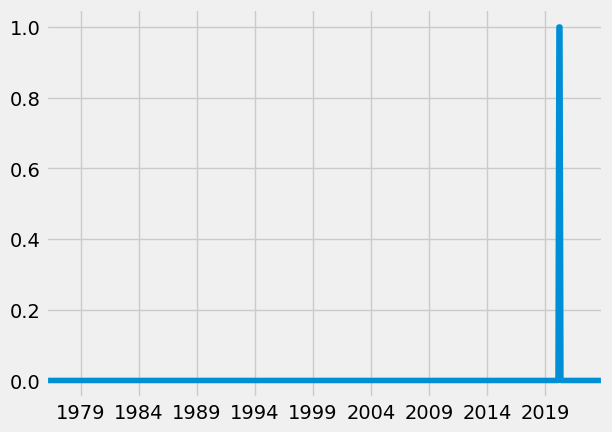

In [18]:
#Check for Null Values

uemp_states.isna().sum(axis=1).plot()

In [19]:
# Plot States Unemployment Rates

px.line(uemp_states)

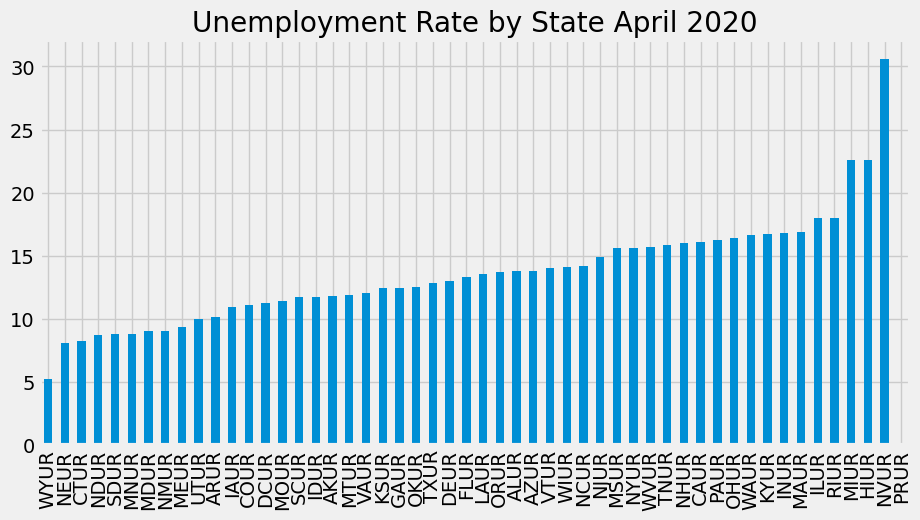

In [20]:
# Pull April 2020 Unemployment Rates per State

uemp_states.loc[uemp_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='bar', figsize=(10, 5),
          title='Unemployment Rate by State April 2020') \
    .legend().remove()

In [21]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()

In [22]:
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [23]:
uemp_states.head()

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,Illinois,...,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.6,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.6,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.6,...,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.6,...,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.6,...,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1


In [24]:
# Plot States Unemployment Rates

px.line(uemp_states)

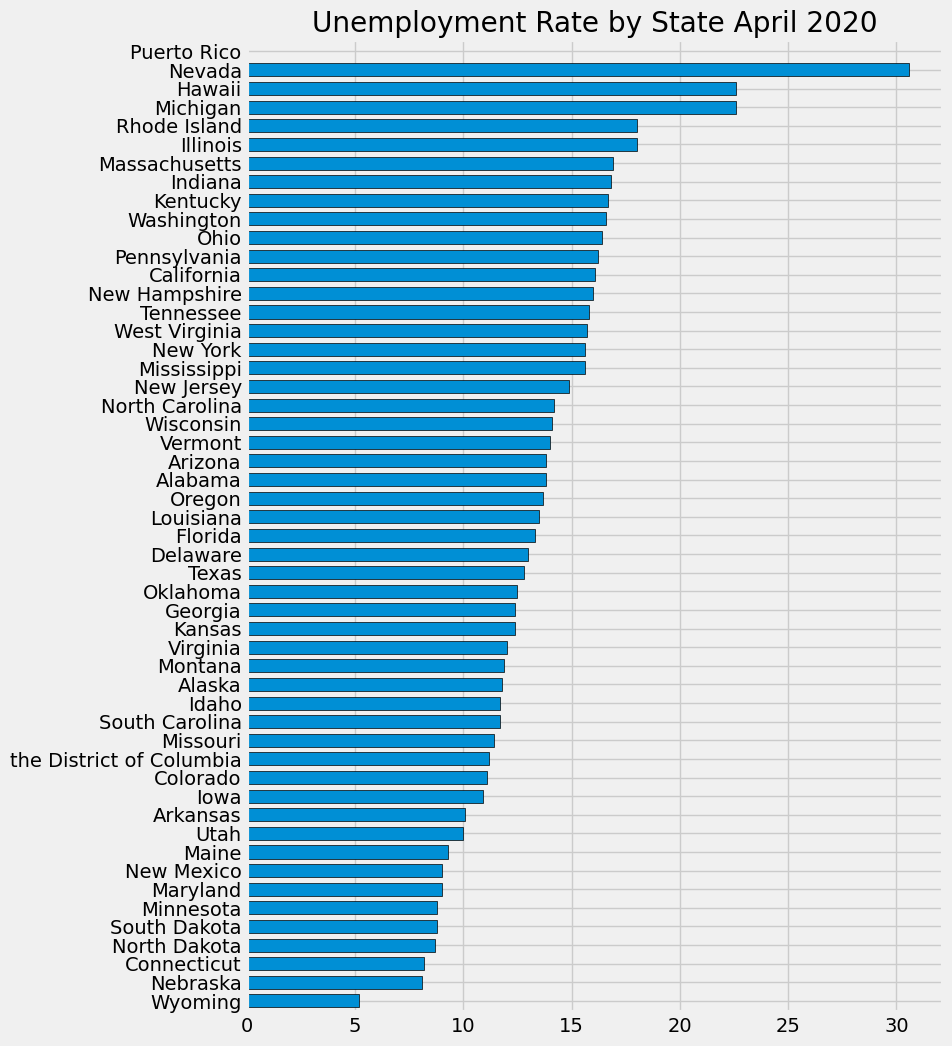

In [28]:
uemp_states.loc[uemp_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='barh', figsize=(8, 12), width=.7, edgecolor='black',
          title='Unemployment Rate by State April 2020') \
    .legend().remove()